In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your actual dataset
df = pd.read_csv("10_Property_stolen_and_recovered.csv", encoding='latin1')

# Show first few rows
df.head()


,ï»¿Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [3]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ï»¿Area_Name                 2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


Index(['ï»¿Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [5]:
df.columns

Index(['ï»¿Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [7]:
# Group by crime type (Group_Name)
grouped = df.groupby('Group_Name').agg({
    'Value_of_Property_Stolen': 'sum',
    'Value_of_Property_Recovered': 'sum'
}).reset_index()

# Calculate recovery percentage
grouped['Recovery Rate (%)'] = round(
    (grouped['Value_of_Property_Recovered'] / grouped['Value_of_Property_Stolen']) * 100, 2
)

# Sort descending by stolen value
grouped = grouped.sort_values(by='Value_of_Property_Stolen', ascending=False)

# Show top 10 crime groups
grouped.head(10)


,Group_Name,Value_of_Property_Stolen,Value_of_Property_Recovered,Recovery Rate (%)
6,Total Property,301891594919,71754737011,23.77
5,Theft - Property,100421322551,33440290382,33.30
3,Other heads of Property,76661474892,7156268132,9.33
1,Criminal Breach of Trust - Property,59792902381,6610363959,11.06
0,Burglary - Property,33789815938,9164296467,27.12
2,Dacoity -Property,16758361312,10479315553,62.53
4,Robbery - Property,14468566168,4904269115,33.90


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4540\3957074200.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value_of_Property_Stolen', y='Group_Name', data=top5, palette='magma')


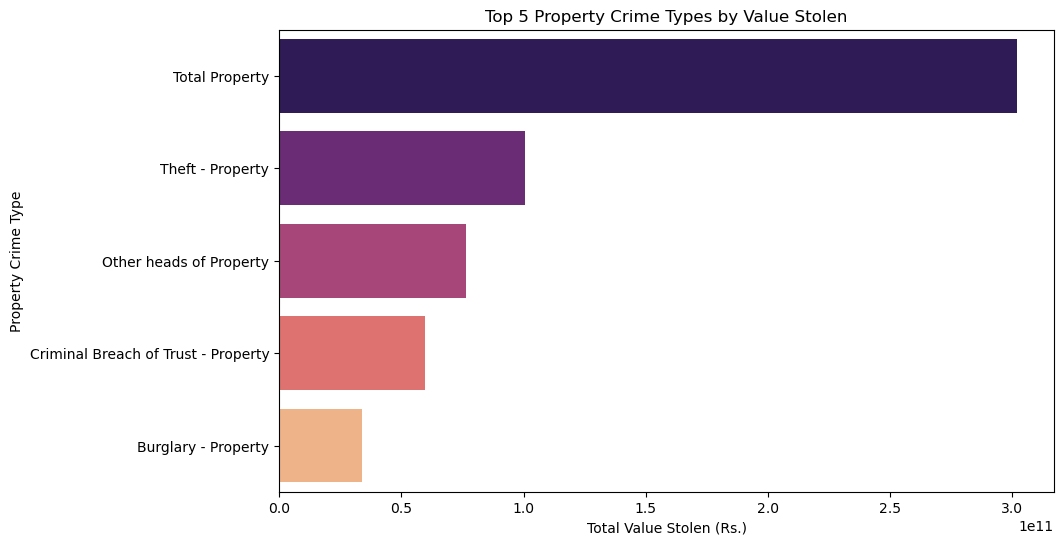

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

top5 = grouped.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Value_of_Property_Stolen', y='Group_Name', data=top5, palette='magma')
plt.title('Top 5 Property Crime Types by Value Stolen')
plt.xlabel('Total Value Stolen (Rs.)')
plt.ylabel('Property Crime Type')
plt.show()


In [9]:
def suggest_action(crime_type, recovery_rate):
    crime_type = crime_type.lower()
    if "vehicle" in crime_type or "automobile" in crime_type:
        return "Track vehicles + strong penalty"
    elif "jewellery" in crime_type:
        return "Fine + jail 3-7 years"
    elif "cash" in crime_type or "currency" in crime_type:
        return "High priority: jail 5-10 years"
    elif recovery_rate < 30:
        return "Intensive investigation needed"
    else:
        return "Standard legal process"

grouped['Suggested_Action'] = grouped.apply(
    lambda row: suggest_action(row['Group_Name'], row['Recovery Rate (%)']), axis=1
)

grouped.head(10)


,Group_Name,Value_of_Property_Stolen,Value_of_Property_Recovered,Recovery Rate (%),Suggested_Action
6,Total Property,301891594919,71754737011,23.77,Intensive investigation needed
5,Theft - Property,100421322551,33440290382,33.30,Standard legal process
3,Other heads of Property,76661474892,7156268132,9.33,Intensive investigation needed
1,Criminal Breach of Trust - Property,59792902381,6610363959,11.06,Intensive investigation needed
0,Burglary - Property,33789815938,9164296467,27.12,Intensive investigation needed
2,Dacoity -Property,16758361312,10479315553,62.53,Standard legal process
4,Robbery - Property,14468566168,4904269115,33.90,Standard legal process


In [10]:
def generate_report():
    top_crime = grouped.iloc[0]
    return (f"📝 Property Crime Report:\n\n"
            f"Most stolen property type: {top_crime['Group_Name']}\n"
            f"Total value stolen: ₹{top_crime['Value_of_Property_Stolen']:,}\n"
            f"Total value recovered: ₹{top_crime['Value_of_Property_Recovered']:,}\n"
            f"Recovery rate: {top_crime['Recovery Rate (%)']}%\n"
            f"Suggested action: {top_crime['Suggested_Action']}\n")

print(generate_report())


📝 Property Crime Report:

Most stolen property type: Total Property
Total value stolen: ₹301,891,594,919
Total value recovered: ₹71,754,737,011
Recovery rate: 23.77%
Suggested action: Intensive investigation needed

